In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Celzene It Service\\Downloads\\index.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [4]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.7,Latte
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.9,Americano
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [6]:
df.shape

(1133, 6)

In [7]:
mode_value = df['card'].mode()[0]

In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
df['card'].fillna(mode_value, inplace=True)

In [10]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

C:\Users\Celzene It Service\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


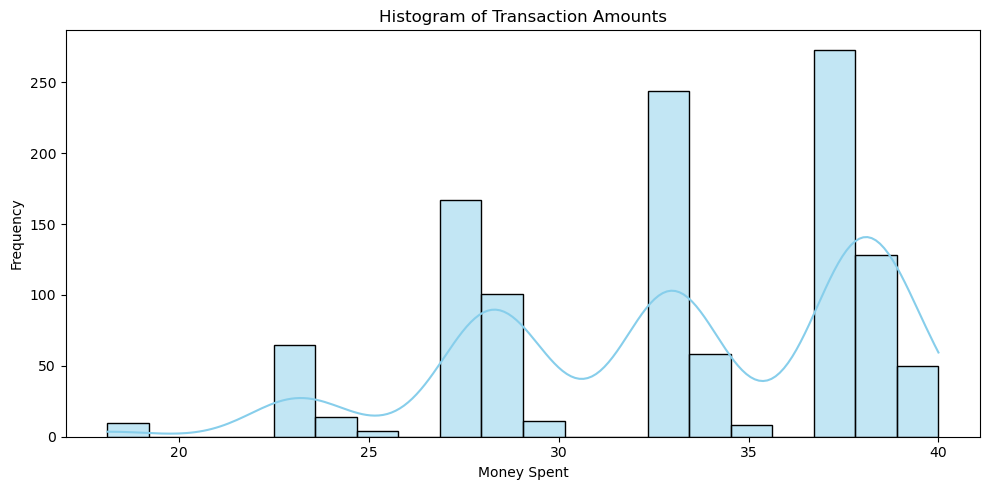

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['money'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Money Spent')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='Set2')
plt.title('Top Coffee Purchase Count by Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

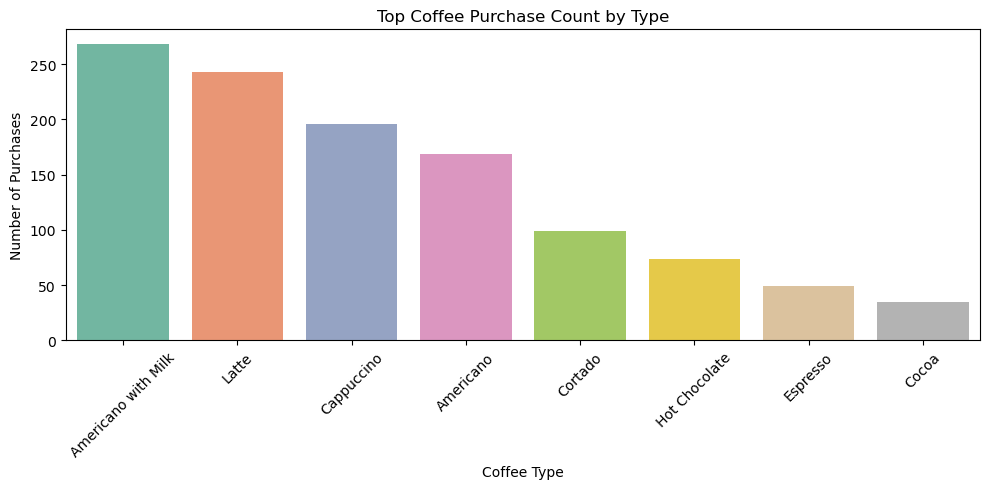

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='Set2')
plt.title('Top Coffee Purchase Count by Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

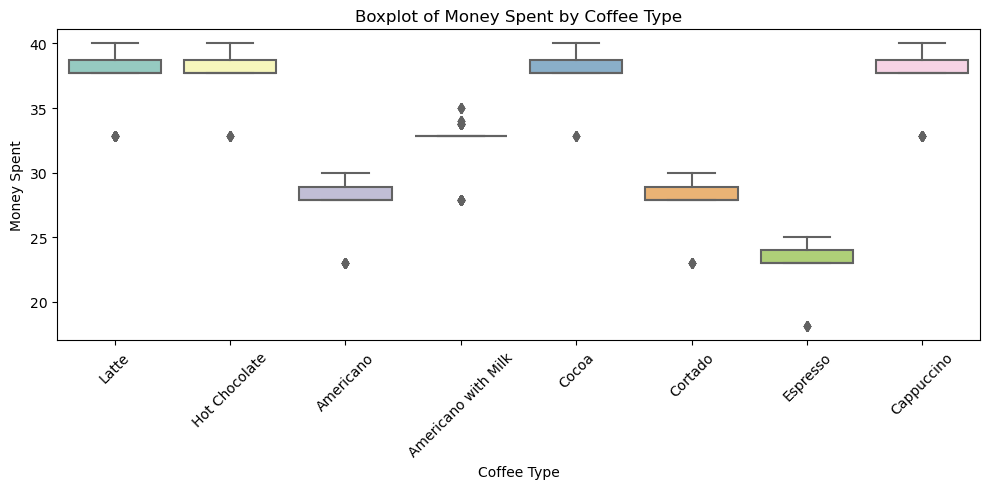

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='coffee_name', y='money', palette='Set3')
plt.title('Boxplot of Money Spent by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Money Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
customer_spending = df.groupby('date')['money'].agg(['sum', 'mean', 'count']).reset_index()
customer_spending.columns = ['date', 'total_spent', 'avg_spent', 'num_purchases']

# Sort by total spent
top_customers = customer_spending.sort_values(by='total_spent', ascending=False)

# Display top 10 spenders
print(top_customers.head(10))

           date  total_spent  avg_spent  num_purchases
146  30-07-2024       650.48  27.103333             24
149  31-07-2024       633.84  28.810909             22
109  23-05-2024       575.40  35.962500             16
94   20-05-2024       559.02  32.883529             17
124  26-05-2024       526.60  35.106667             15
148  31-05-2024       499.96  35.711429             14
93   20-04-2024       494.30  35.307143             14
37   09-03-2024       479.40  34.242857             14
16   04-06-2024       474.18  33.870000             14
126  26-07-2024       461.42  28.838750             16


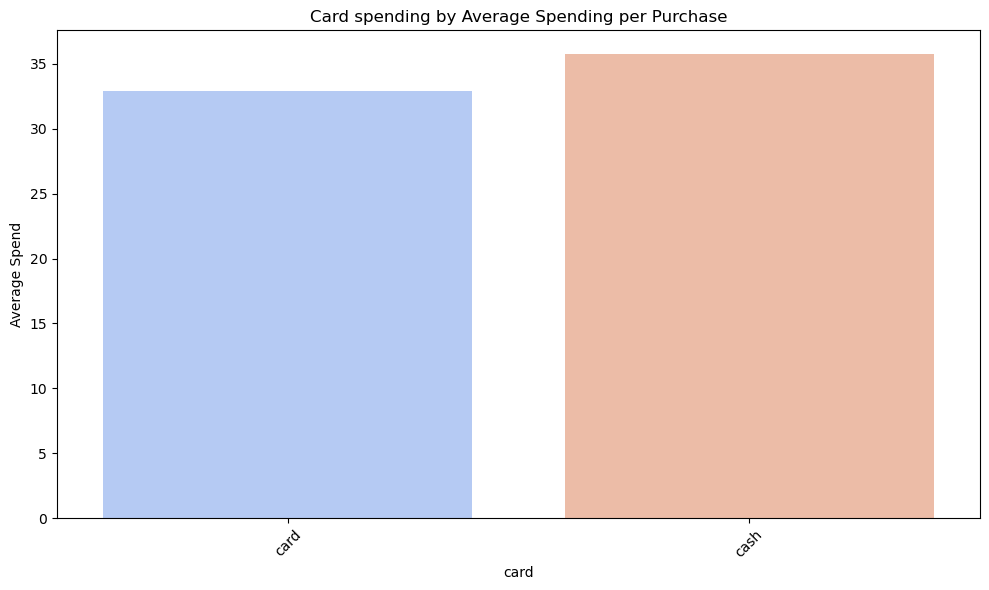

In [15]:
# Plot average spend per purchase by top customers
cash_spending = df.groupby('cash_type')['money'].agg(['sum', 'mean', 'count']).reset_index()
cash_spending.columns = ['cash_type', 'total_spent', 'avg_spent', 'num_purchases']

# Sort by total spent
top_customers = cash_spending.sort_values(by='total_spent', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='cash_type', y='avg_spent', palette='coolwarm')
plt.title('Card spending by Average Spending per Purchase')
plt.xlabel('card')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [17]:
# Features and target
X = df[['cash_type', 'card', 'coffee_name']]
y = df['money']

In [18]:
# Preprocess categorical variables with OneHotEncoding
categorical_features = ['coffee_name', 'card', 'cash_type']

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [20]:
# Build pipeline with preprocessing + linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['coffee_name', 'card',
                                                   'cash_type'])])),
                ('regressor', LinearRegression())])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['coffee_name', 'card',
                                                   'cash_type'])])),
                ('regressor', LinearRegression())])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# Predict and evaluate
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2.58
R^2 Score: 0.86
